<a href="https://colab.research.google.com/github/faisalfaturohman/Coba/blob/master/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Data Science Course - Telkom Digital Talent Incubator*


---




Nama : Faisal Faturohman
Kelas : Data Science 01
NIP : DS0110

# **Multiple Linear Regression**
Multiple linear regression (analisis regresi linear ganda) adalah analisis statistik yang digunakan untuk mengetahui pengaruh beberapa variabel bebas (independent) terhadap variabel terikat (dependent).

## **Multiple Linear Regression**



Import *Library* yang digunakan pada Multiple Linear Regression :



1.   Pandas digunakan untuk proses *import dataset* dengan format CSV
2.   Numpy digunakan untuk perhitungan
3.   Statsmodels digunakan untuk menganalisis secara statistik
4.   Seaborn digunakan untuk visualisasi data
5. matplotlib digunakan untuk visualisasi data
6. sklearn digunakan untuk membuat model Linear Regression  

In [ ]:
# Import library yang digunakan

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

In [ ]:
# Import Dataset yang digunakan
df = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


Pada *Dataset* diatas merupakan daftar penjualan pie dalam 15 minggu yang dipengaruhi oleh harga dan iklan. Dalam keterangan iklan bernilai 100$ jadi semuanya dikalikan.

Yang akan diprediksi adalah penjualan pie tiap minggu berdasarkan harga pie dan iklan.

In [ ]:
# Perubahan harga iklan 

df['advertising'] = df['advertising']*100 

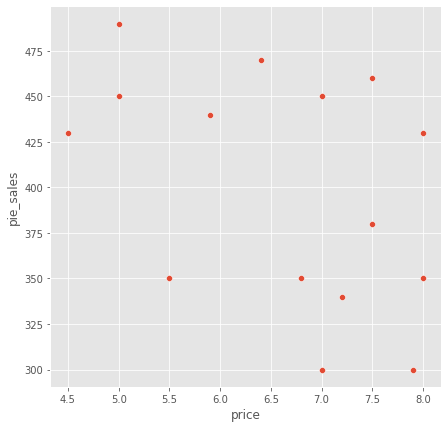

In [ ]:
# Visualisasi data menggunakan scatterplot

sns.scatterplot(x=df["price"], y=df["pie_sales"], data=df)

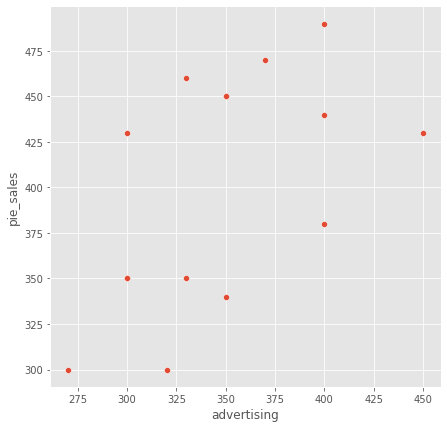

In [ ]:
# Visualisasi data menggunakan scatterplot

sns.scatterplot(x=df["advertising"], y=df["pie_sales"], data=df)

In [ ]:
#Input X & Y value

X = df[['price','advertising']]
Y = df['pie_sales']

### **Regression using Sklearn**

In [ ]:
# Multiple Linear Regression
# Deklarasi model
mLR = linear_model.LinearRegression()

# Model di fit dengan nilai X dan Y
mLR.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Setelah model di fit dengan nilai X dan Y maka harus dicari nilai b0 = intercept dan coefficients (b1, b2,......bn).

In [ ]:
print('Intercept: \n', mLR.intercept_)

Intercept: 
 306.5261932837435


In [ ]:
print('Coefficients: \n', mLR.coef_)

Coefficients: 
 [-24.97508952   0.74130957]


Didapatkan nilai *intercept* sebesar 306.526 dan *coefficients* (-24.975, 0.741) jumlah *coefficient* tergantung dari banyaknya *independent* variabel dimana pada kasus ini hanya ada 2 variabel. 
Setelah itu dilakukan pencarian nilai r *square* untuk mengetahui koefisien determinasi yang menjelaskan seberapa jauh data dependen dapat dijelaskan oleh data independen.

In [ ]:
# Find the R^2

print('The R-square             : ', mLR.score(X,Y))

The R-square             :  0.5214779360292288


Pada hasil diatas didapatkan nilai r square yang cukup kecil karena hanya 0.521 yang berarti data independen hanya bisa menjelaskan 52.1% dari total sebaran variabel dependen.

In [ ]:
# mencari nilai mean square error

from sklearn.metrics import mean_squared_error
predict = mLR.predict(X)
print('mean square error dari pie sales and nilai prediksi menggunakan multifit: ', \
      mean_squared_error(df['pie_sales'],predict))

mean square error dari pie sales and nilai prediksi menggunakan multifit:  1802.2204311503622


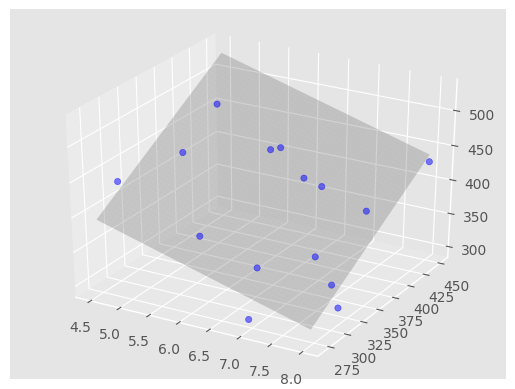

In [ ]:
#visualisasi 3 dimensi dari 3 variabel
x_surf, y_surf = np.meshgrid(np.linspace(df.price.min(), df.price.max(), 100),
                             np.linspace(df.advertising.min(), df.advertising.max(),100))
X_value = pd.DataFrame({'price': x_surf.ravel(), 'advertising': y_surf.ravel()})

plt.style.use('default')
plt.style.use('ggplot')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

fit = mLR.predict(X_value)
fit = np.array(fit)

ax.scatter(df['price'], df['advertising'], df['pie_sales'],c='blue', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, fit.reshape(x_surf.shape), color='w', alpha=0.3)

In [ ]:
# Prediksi Penjualan pie tiap satu minggu sekali

new_price = 5.5
new_advertising = 330 
print ('Prediksi penjualan pie tiap minggu : \n', mLR.predict([[new_price, new_advertising]]))

Prediksi penjualan pie tiap minggu : 
 [413.79536065]


In [ ]:
# Prediksi Penjualan pie tiap satu minggu sekali

new_price = 5.5
new_advertising = 400 
print ('Prediksi penjualan pie tiap minggu : \n', mLR.predict([[new_price, new_advertising]]))

Prediksi penjualan pie tiap minggu : 
 [465.68703089]


In [ ]:
# Prediksi Penjualan pie tiap satu minggu sekali

new_price = 6
new_advertising = 400 
print ('Prediksi penjualan pie tiap minggu : \n', mLR.predict([[new_price, new_advertising]]))

Prediksi penjualan pie tiap minggu : 
 [453.19948613]


Dilihat dari prediksi diatas jika menambahkan modal terhadap iklan maka akan meningkatkan penjualan pie setiap minggunya.

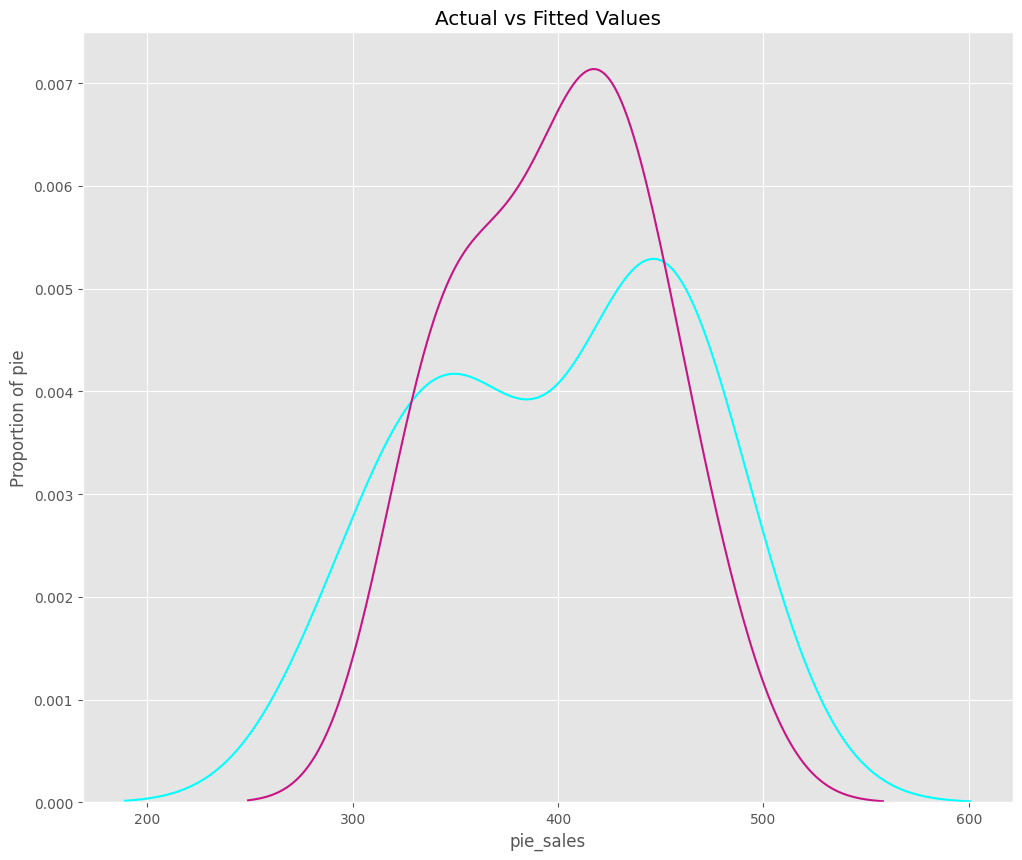

In [ ]:
#visualisasi antara data aktual dan hasil prediksi
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['pie_sales'], hist=False, color="cyan", label="Actual Value")
sns.distplot(pred, hist=False, color="mediumvioletred", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values')
plt.xlabel('pie_sales')
plt.ylabel('Proportion of pie')


plt.show()
plt.close()

Dalam proses visualisasi terlihat sekali perbedaan data aktual dan dan data prediksi yang sangat jauh sehingga menjadikan akurasi yang didapatkan dengan data aktual kurang bisa dipercaya selain dari faktor r *square* yang kecil.

### **Regression Menggunakan Statsmodels**

Statsmodels digunakan untuk perform Multiple linear regression. Statsmodels adalah modul python yang yang menyediakan kelas dan fungsi untuk estimasi model statistik yang berbeda, serta uji statistik yang berbeda.

In [ ]:
X = sm.add_constant(X) # adding a constant

In [ ]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0120
Time:                        16:29:52   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      